## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Understanding

The client is a real estate agency that advises clients on the attractiveness of renovation opportunities.  It is necessary to know the impact on the housing price of various real estate metrics, so that the price benefit can be compared to cost estimates received by the clients of the real estate agency. 

# Data Understanding

The data is housing data from a Northwestern county and comes from the county government.  Key data categories include price, number of rooms, various square footage metrics, and age of the house. Each row of data represents a different house. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
data.heat_source.unique()

array(['Gas', 'Oil', 'Electricity', 'Gas/Solar', 'Electricity/Solar',
       'Other', nan, 'Oil/Solar'], dtype=object)

In [6]:
data.sewer_system.unique()

array(['PUBLIC', 'PRIVATE', 'PRIVATE RESTRICTED', nan,
       'PUBLIC RESTRICTED'], dtype=object)

In [7]:
data.yr_built.value_counts().sort_index()

1900     118
1901      39
1902      36
1903      56
1904      73
        ... 
2018     361
2019     299
2020     507
2021    1707
2022     302
Name: yr_built, Length: 123, dtype: int64

In [8]:
data['yr_built_adj']=data['yr_built']-1900

In [9]:
data.yr_renovated.value_counts().sort_index()

0       28783
1924        1
1928        2
1930        1
1940        3
        ...  
2018       44
2019       35
2020       28
2021       69
2022       13
Name: yr_renovated, Length: 83, dtype: int64

In [10]:
data.iloc[:,[5,6,16,17,18,19]]

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio
0,1180,7140,1180,0,0,40
1,2770,6703,1570,1570,0,240
2,2880,6156,1580,1580,0,0
3,2160,1400,1090,1070,200,270
4,1120,758,1120,550,550,30
...,...,...,...,...,...,...
30150,1910,4000,1600,1130,0,210
30151,2020,5800,2020,0,0,520
30152,1620,3600,940,920,240,110
30153,2570,2889,1830,740,480,100


In [11]:
data.grade.unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '1 Cabin', '2 Substandard'], dtype=object)

In [12]:
data.yr_built.value_counts()

2021    1707
1968     516
2020     507
1978     493
1977     484
        ... 
1901      39
1935      39
1934      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64

In [13]:
data.condition.unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [14]:
data.price.unique()

array([ 675000.,  920000.,  311000., ..., 3754500., 2435000.,  656500.])

In [15]:
data.price.value_counts().sort_index()

27360.0       1
27563.0       1
28307.0       1
28559.0       1
28854.0       1
             ..
17800000.0    1
20000000.0    1
22750000.0    1
23500000.0    1
30750000.0    1
Name: price, Length: 5202, dtype: int64

<AxesSubplot:ylabel='Frequency'>

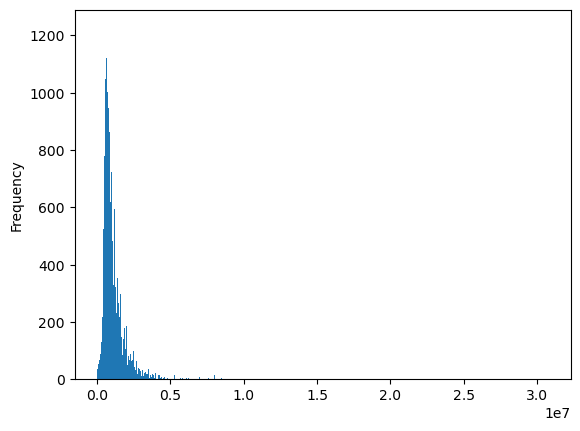

In [16]:
data.price.plot(kind='hist', bins=1000)

somewhat skewed, not normal distr.

In [17]:
data.price.mean()

1108535.837871

In [18]:
data.price.value_counts().sort_index().tail(20)

11300000.0    1
11400000.0    1
11625000.0    1
12125000.0    1
12750000.0    1
12901148.0    1
12932174.0    1
13300000.0    1
13425000.0    1
13850000.0    1
13950000.0    1
14500000.0    1
14850000.0    1
15000001.0    1
15740000.0    1
17800000.0    1
20000000.0    1
22750000.0    1
23500000.0    1
30750000.0    1
Name: price, dtype: int64

## Convert grade data to numeric

In [19]:
grade_array = list(data['grade'])

In [20]:
grade_array_split =[]
for i in grade_array:
    split = i.split(" ")
    grade_array_split.append(split[0])

In [21]:
grade_num= grade_array_split

In [22]:
grade_num

['7',
 '7',
 '7',
 '9',
 '7',
 '7',
 '9',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '9',
 '8',
 '7',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '6',
 '9',
 '7',
 '7',
 '9',
 '9',
 '8',
 '9',
 '7',
 '8',
 '8',
 '7',
 '7',
 '10',
 '9',
 '8',
 '8',
 '10',
 '7',
 '7',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '8',
 '9',
 '7',
 '8',
 '5',
 '8',
 '7',
 '7',
 '7',
 '7',
 '8',
 '7',
 '8',
 '7',
 '9',
 '8',
 '9',
 '7',
 '7',
 '7',
 '8',
 '7',
 '8',
 '7',
 '8',
 '7',
 '9',
 '8',
 '8',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '6',
 '8',
 '8',
 '8',
 '7',
 '8',
 '7',
 '5',
 '7',
 '5',
 '7',
 '7',
 '8',
 '7',
 '8',
 '6',
 '8',
 '6',
 '8',
 '9',
 '7',
 '8',
 '5',
 '7',
 '6',
 '8',
 '7',
 '7',
 '7',
 '8',
 '7',
 '6',
 '7',
 '5',
 '7',
 '7',
 '6',
 '9',
 '8',
 '8',
 '9',
 '7',
 '6',
 '7',
 '7',
 '7',
 '8',
 '9',
 '9',
 '6',
 '9',
 '9',
 '6',
 '9',
 '6',
 '8',
 '9',
 '10',
 '7',
 '8',
 '7',
 '9',
 '8',
 '7',
 '11',
 '7',
 '7',
 '8',
 '9',
 '8',
 '10',
 '7',
 '9',
 '8',
 '9',
 '7',
 '11',
 '7',
 '11',
 '8',
 '7',
 '8',
 '7

In [23]:
grade_num

['7',
 '7',
 '7',
 '9',
 '7',
 '7',
 '9',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '9',
 '8',
 '7',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '6',
 '9',
 '7',
 '7',
 '9',
 '9',
 '8',
 '9',
 '7',
 '8',
 '8',
 '7',
 '7',
 '10',
 '9',
 '8',
 '8',
 '10',
 '7',
 '7',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '8',
 '9',
 '7',
 '8',
 '5',
 '8',
 '7',
 '7',
 '7',
 '7',
 '8',
 '7',
 '8',
 '7',
 '9',
 '8',
 '9',
 '7',
 '7',
 '7',
 '8',
 '7',
 '8',
 '7',
 '8',
 '7',
 '9',
 '8',
 '8',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '6',
 '8',
 '8',
 '8',
 '7',
 '8',
 '7',
 '5',
 '7',
 '5',
 '7',
 '7',
 '8',
 '7',
 '8',
 '6',
 '8',
 '6',
 '8',
 '9',
 '7',
 '8',
 '5',
 '7',
 '6',
 '8',
 '7',
 '7',
 '7',
 '8',
 '7',
 '6',
 '7',
 '5',
 '7',
 '7',
 '6',
 '9',
 '8',
 '8',
 '9',
 '7',
 '6',
 '7',
 '7',
 '7',
 '8',
 '9',
 '9',
 '6',
 '9',
 '9',
 '6',
 '9',
 '6',
 '8',
 '9',
 '10',
 '7',
 '8',
 '7',
 '9',
 '8',
 '7',
 '11',
 '7',
 '7',
 '8',
 '9',
 '8',
 '10',
 '7',
 '9',
 '8',
 '9',
 '7',
 '11',
 '7',
 '11',
 '8',
 '7',
 '8',
 '7

In [24]:
data['grade_num']=grade_num

In [25]:
data['grade_num']=data['grade_num'].astype(int)

In [26]:
data['grade_num']

0        7
1        7
2        7
3        9
4        7
        ..
30150    8
30151    7
30152    7
30153    8
30154    7
Name: grade_num, Length: 30155, dtype: int32

<AxesSubplot:xlabel='grade_num', ylabel='price'>

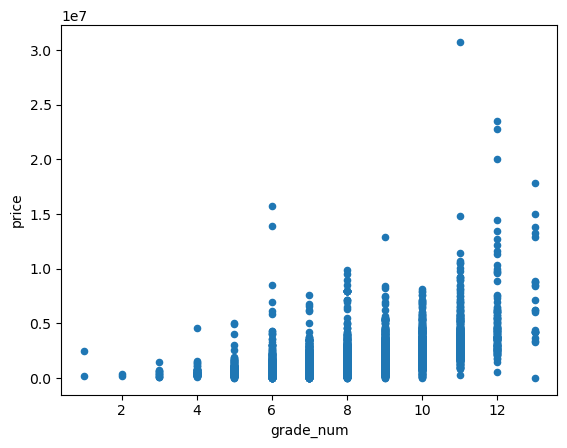

In [27]:
data.plot(kind = 'scatter', x = 'grade_num', y='price')

Apparent correlation between grade and price.

## Convert condition data to numeric

In [28]:
condition_num = data['condition'].replace({'Good': 3, 'Average':2, 'Very Good':4, 'Fair':1, 'Poor':0})

In [29]:
data['condition_num'] =condition_num

<AxesSubplot:xlabel='condition_num', ylabel='price'>

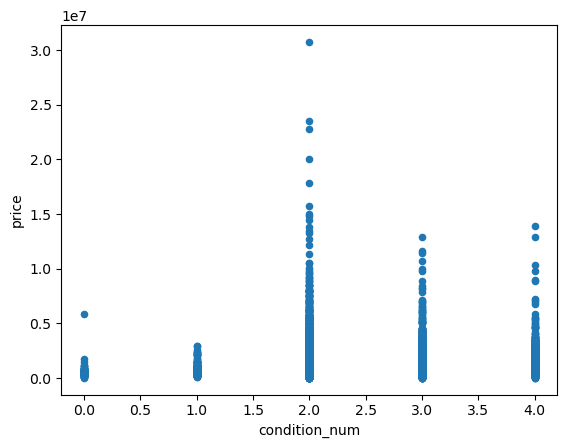

In [30]:
data.plot(kind = 'scatter', x = 'condition_num', y='price')

Some correlation between condition and price.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

## Convert view variable to numeric

In [32]:
view_num = data['view'].replace({'NONE': 0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4})

In [33]:
data['view_num']=view_num

In [34]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,yr_built_adj,grade_num,condition_num,view_num
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479,0.023071,0.002979,-0.010001,-0.008120
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509,0.096013,0.565263,-0.008704,0.315265
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689,0.146191,0.374764,0.035438,0.054506
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400,0.443648,0.647784,-0.064890,0.155433
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669,0.291694,0.721359,-0.053933,0.242278
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308,0.001750,0.053337,-0.000114,0.096005
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781,0.544646,0.464772,-0.281849,-0.007652
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744,0.387448,0.702277,-0.136394,0.132554
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208,-0.230226,0.139084,0.094894,0.264925
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861,0.447560,0.497407,-0.067492,0.029903


## Create dummy variables

In [35]:
data_wdum= pd.get_dummies(data, columns = ['waterfront','heat_source','greenbelt','nuisance','sewer_system'], drop_first=True)

In [36]:
data_wdum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               30155 non-null  int64  
 1   date                             30155 non-null  object 
 2   price                            30155 non-null  float64
 3   bedrooms                         30155 non-null  int64  
 4   bathrooms                        30155 non-null  float64
 5   sqft_living                      30155 non-null  int64  
 6   sqft_lot                         30155 non-null  int64  
 7   floors                           30155 non-null  float64
 8   view                             30155 non-null  object 
 9   condition                        30155 non-null  object 
 10  grade                            30155 non-null  object 
 11  sqft_above                       30155 non-null  int64  
 12  sqft_basement     

In [37]:
df = data_wdum

## Check correlations with new dummy variables

In [38]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,greenbelt_YES,nuisance_YES,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,...,0.065247,0.000669,-0.018431,-0.002970,-0.013561,0.056260,-0.051752,-0.008856,0.147135,-0.008663
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,...,0.143009,0.036684,-0.067977,-0.002266,0.001132,0.068256,0.011547,-0.005218,0.021788,-0.001262
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,...,0.230824,0.014343,-0.090863,-0.007786,-0.018727,0.064844,-0.050826,-0.015524,0.036675,0.002572
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,...,0.273275,0.032520,-0.251658,-0.007571,-0.014762,0.093470,-0.050673,-0.006630,0.035925,0.001853
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,...,0.274636,0.031879,-0.142542,-0.002955,-0.005183,0.115545,-0.059699,-0.009353,-0.059627,0.000521
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,...,-0.072222,0.001213,0.009738,-0.001389,0.059327,-0.012787,0.012449,0.002086,-0.359687,-0.002052
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,...,0.121139,0.001533,-0.221264,-0.005955,-0.001974,0.065007,-0.016292,-0.001081,0.132968,0.013878
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,...,0.292732,0.016173,-0.168157,-0.006161,-0.003575,0.134854,-0.093882,-0.009634,-0.080276,0.002595
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,...,-0.014643,0.031717,0.120700,0.005742,-0.003891,-0.033825,0.072240,-0.003433,0.046279,-0.002255
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,...,0.303519,0.003391,-0.197823,-0.010690,-0.008989,0.127819,-0.147531,-0.009308,-0.120331,-0.000007


In [39]:
df_c = df.loc[:,['price','sqft_living','heat_source_Electricity/Solar','waterfront_YES', 'view_num','yr_built_adj','condition_num','grade_num','yr_renovated']]

In [40]:
df_c.corr()

,price,sqft_living,heat_source_Electricity/Solar,waterfront_YES,view_num,yr_built_adj,condition_num,grade_num,yr_renovated
price,1.000000,0.608521,-0.008419,0.232250,0.315265,0.096013,-0.008704,0.565263,0.084786
sqft_living,0.608521,1.000000,-0.006505,0.078798,0.242278,0.291694,-0.053933,0.721359,0.038499
heat_source_Electricity/Solar,-0.008419,-0.006505,1.000000,-0.005859,0.011942,0.003658,0.015162,-0.004200,0.015572
waterfront_YES,0.232250,0.078798,-0.005859,1.000000,0.425007,-0.042971,0.002685,0.042152,0.097940
view_num,0.315265,0.242278,0.011942,0.425007,1.000000,-0.086632,0.031295,0.198986,0.109863
yr_built_adj,0.096013,0.291694,0.003658,-0.042971,-0.086632,1.000000,-0.319044,0.481647,-0.239284
condition_num,-0.008704,-0.053933,0.015162,0.002685,0.031295,-0.319044,1.000000,-0.153135,-0.079236
grade_num,0.565263,0.721359,-0.004200,0.042152,0.198986,0.481647,-0.153135,1.000000,-0.012093
yr_renovated,0.084786,0.038499,0.015572,0.097940,0.109863,-0.239284,-0.079236,-0.012093,1.000000


Only dummy variables correlated with price is waterfront properties.

# Data Modeling

## Run baseline model

In [41]:
import statsmodels.api as sm

In [42]:
baseline_model = sm.OLS(df['price'], sm.add_constant(df['sqft_living']))
baseline_results = baseline_model.fit()

In [43]:
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:51:52   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

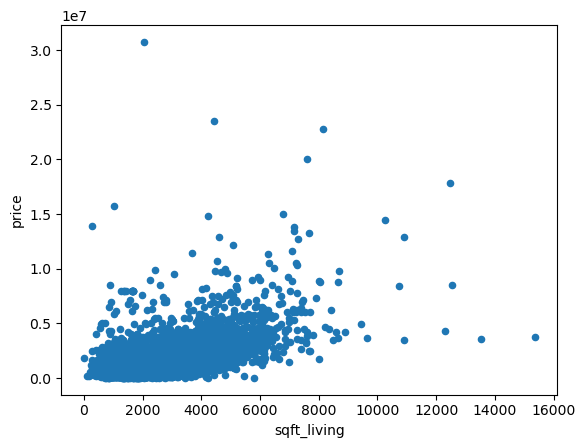

In [44]:
df.plot(kind = 'scatter',x='sqft_living',y= 'price')

Add to model variables with price correlation greater than .25 and sqft_living correlation less than .75

In [45]:
df_X2 = df.loc[:,['sqft_living','bedrooms','sqft_garage', 'sqft_patio', 'grade_num', 'view_num']]


In [46]:
df_X2.head()

,sqft_living,bedrooms,sqft_garage,sqft_patio,grade_num,view_num
0,1180,4,0,40,7,0
1,2770,5,0,240,7,2
2,2880,6,0,0,7,2
3,2160,3,200,270,9,2
4,1120,2,550,30,7,0


In [47]:
model_2575 = sm.OLS(df['price'], sm.add_constant(df_X2))
model_2575_results = model_2575.fit()
model_2575_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     4017.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:51:52   Log-Likelihood:            -4.4724e+05
No. Observations:               30155   AIC:                         8.945e+05
Df Residuals:                   30148   BIC:                         8.945e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.033e+06   3.41e+04    -30.322      0.000    -1.1e+06   -9.66e+05
sqft_living   447.3887      7.399     60.464      0.000     432.886     461.891
bedrooms    -9.338e+04   5211.934    -17.917      0.000   -1.04e+05   -8.32e+04
sqft_garage  -287.6584     16.180    -17.779      0.000    -319.371    -255.946
sqft_patio    121.2789     17.451      6.950      0.000      87.075     155.483
grade_num    2.011e+05   5039.870     39.898      0.000    1.91e+05    2.11e+05
view_num     1.536e+05   4779.896     32.134      0.000    1.44e+05    1.63e+05
==============================================================================
Omnibus:                    43770.267   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50969283.518
Skew:                           8.295   Prob(JB):                         0.00
Kurtosis:                     203.725   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

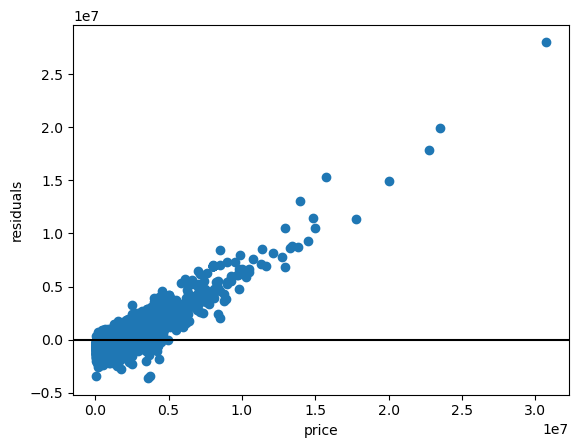

In [48]:
fig, ax = plt.subplots()

ax.scatter(df["price"], model_2575_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("price")
ax.set_ylabel("residuals");

big non-linearity issue, maybe heterskedaticity issue.

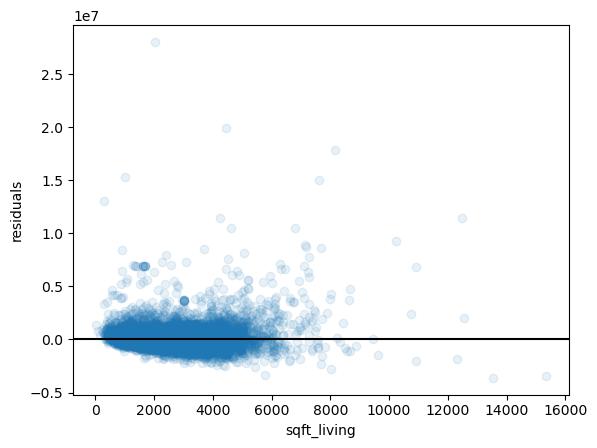

In [49]:
fig, ax = plt.subplots()

ax.scatter(df_X2["sqft_living"], model_2575_results.resid, alpha =.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

some heteroskedaticity

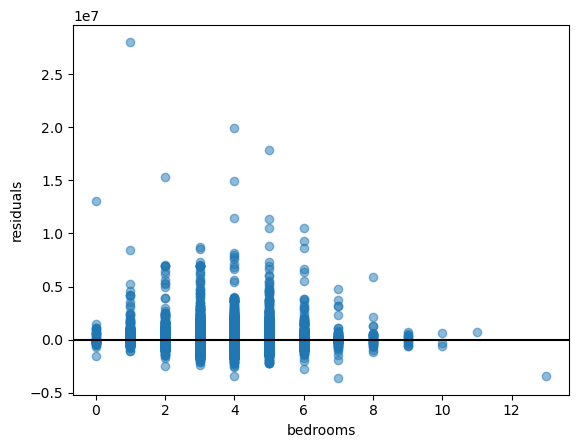

In [50]:
fig, ax = plt.subplots()

ax.scatter(df_X2["bedrooms"], model_2575_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("bedrooms")
ax.set_ylabel("residuals");

possible heteroskedaticity

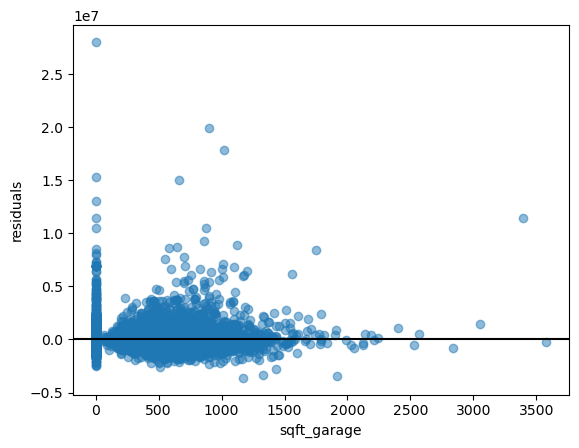

In [51]:
fig, ax = plt.subplots()

ax.scatter(df_X2["sqft_garage"], model_2575_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_garage")
ax.set_ylabel("residuals");

possible heteroskedaticity

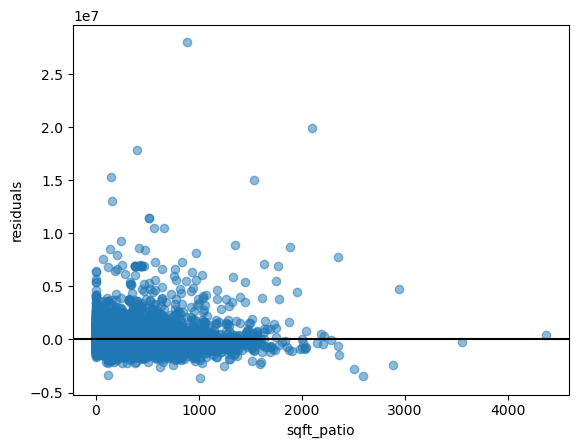

In [52]:
fig, ax = plt.subplots()

ax.scatter(df_X2["sqft_patio"], model_2575_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_patio")
ax.set_ylabel("residuals");

likely heteroskedaticity issue.

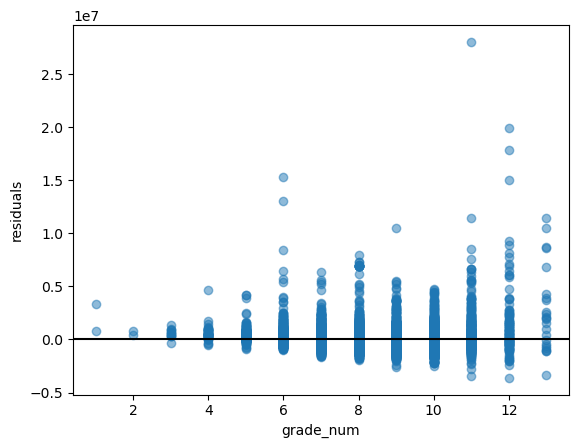

In [53]:
fig, ax = plt.subplots()

ax.scatter(df_X2["grade_num"], model_2575_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("grade_num")
ax.set_ylabel("residuals");

some heteroskedaticity

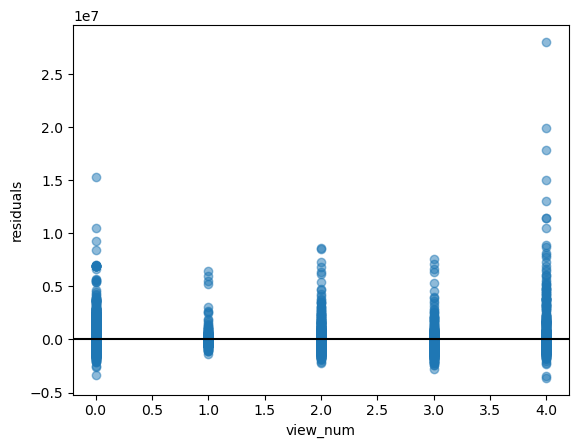

In [54]:
fig, ax = plt.subplots()

ax.scatter(df_X2["view_num"], model_2575_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("view_num")
ax.set_ylabel("residuals");

slight heteroskedaticity.

eval_env: 1
eval_env: 1


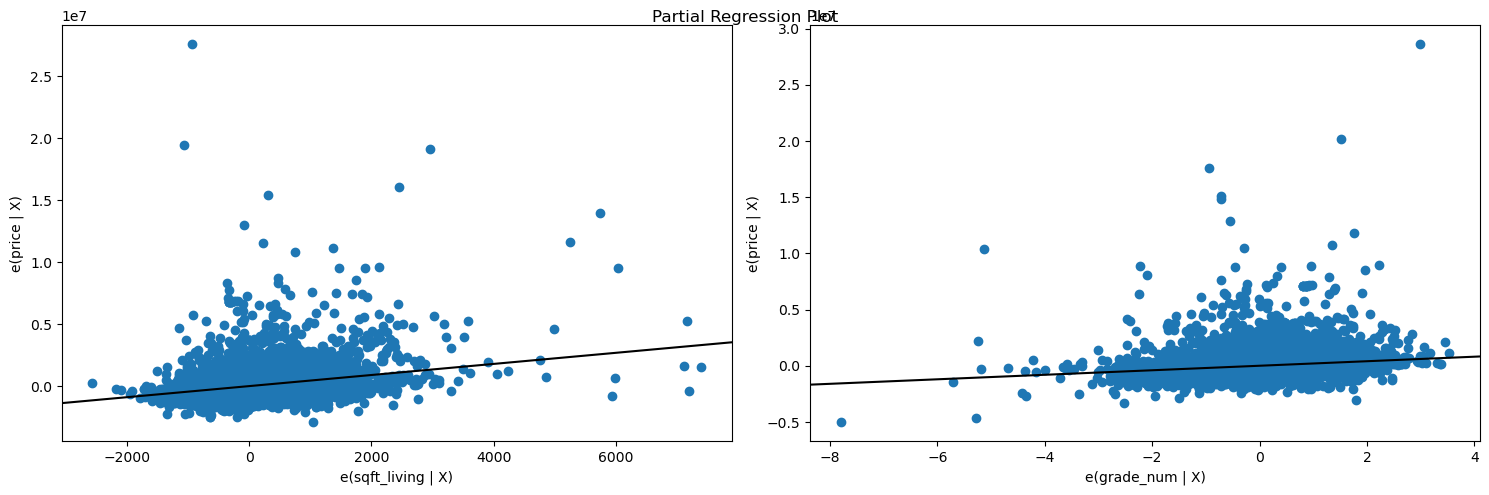

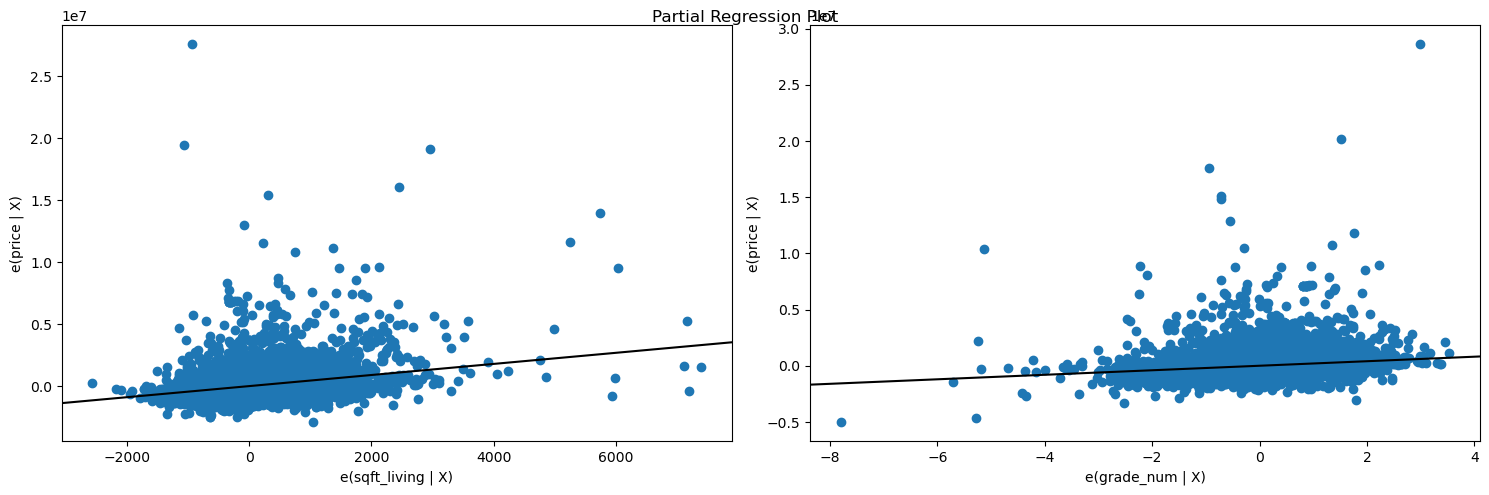

In [55]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(model_2575_results, exog_idx=["sqft_living", "grade_num"], fig=fig)

maybe non-linearity or heteroskedaticity, more for sqft_living than grade_num

<AxesSubplot:ylabel='Frequency'>

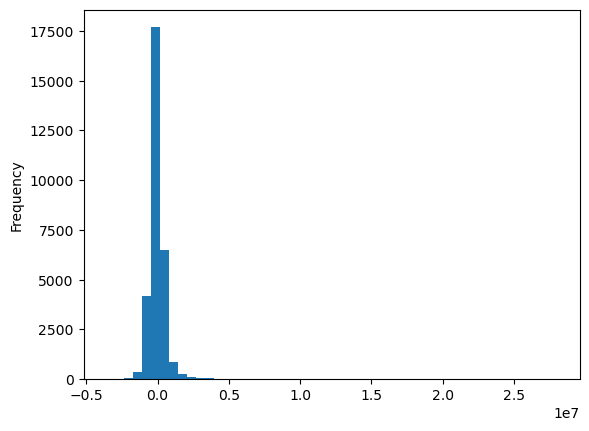

In [124]:
model_2575_results.resid.plot(kind ='hist', bins = 50)

In [ ]:
fairly normal residuals.

In [57]:


## Outlier part

In [58]:
df_RemOut = df.drop(df.loc[df['price']>10000000].index)

In [59]:
df_RemOut.price.value_counts().sort_index()

27360.0       1
27563.0       1
28307.0       1
28559.0       1
28854.0       1
             ..
9650000.0     1
9700000.0     1
9800000.0     2
9842400.0     1
10000000.0    1
Name: price, Length: 5178, dtype: int64

In [ ]:
## end outlier part

checking for non-normality in variables based on non-linearity issues.

<AxesSubplot:ylabel='Frequency'>

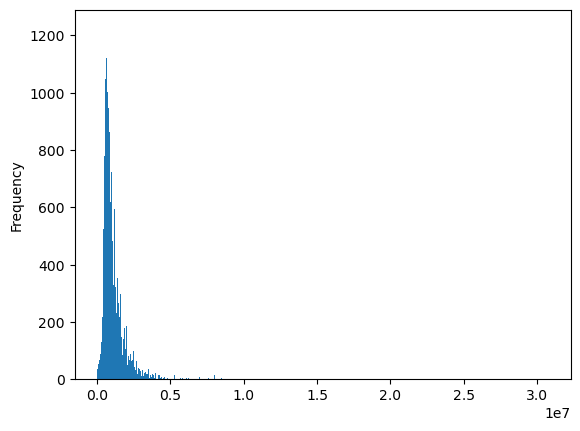

In [122]:
data.price.plot(kind='hist', bins=1000)

somewhat skewed, not normal distr.

<AxesSubplot:ylabel='Frequency'>

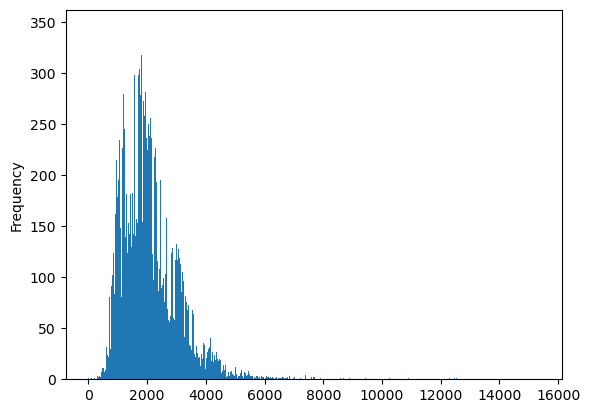

In [60]:
data.sqft_living.plot(kind='hist', bins=1000)

non-normal, skewed

<AxesSubplot:ylabel='Frequency'>

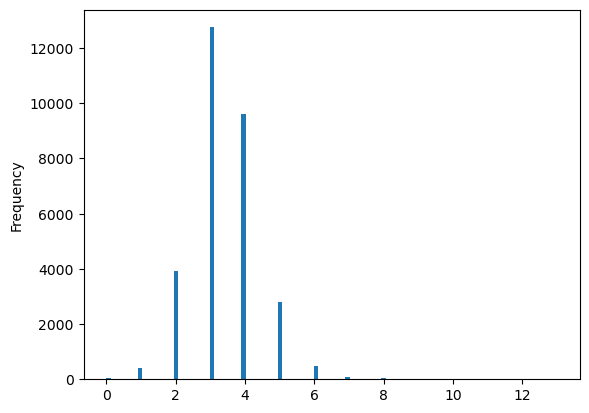

In [61]:
data.bedrooms.plot(kind='hist', bins=100)

maybe normal

<AxesSubplot:ylabel='Frequency'>

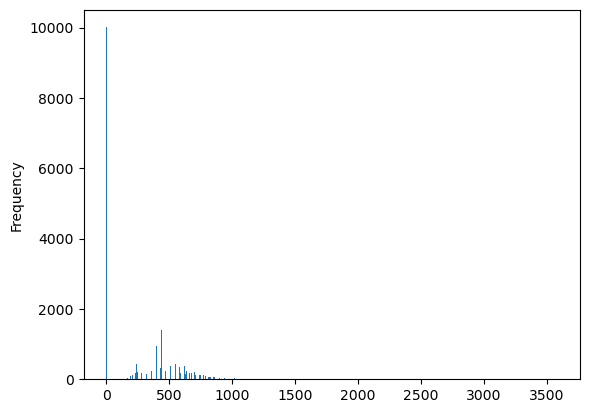

In [62]:
data.sqft_garage.plot(kind='hist', bins=1000)

maybe normal

<AxesSubplot:ylabel='Frequency'>

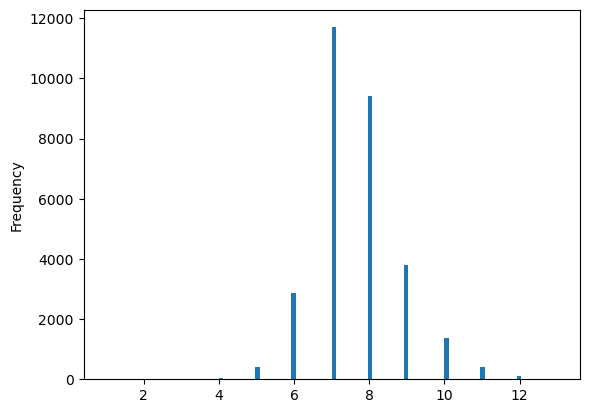

In [63]:
data.grade_num.plot(kind='hist', bins=100)

maybe normal

<AxesSubplot:ylabel='Frequency'>

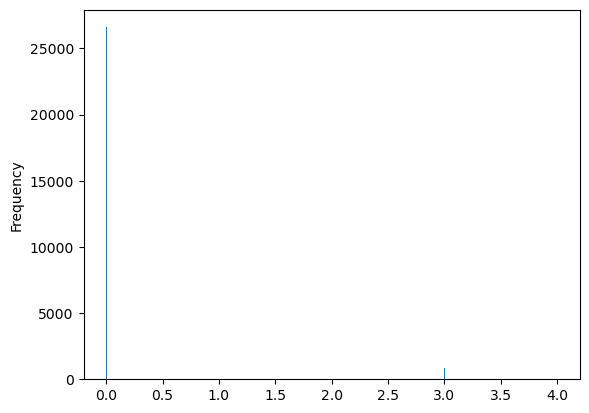

In [64]:
data.view_num.plot(kind='hist', bins=1000)

maybe not-normal

## Scale second model predictors to z-scores in order to make model coefficients more interpretable by reducing very large coefficients.

In [65]:
df_X2_sc= (df_X2-np.mean(df_X2))/np.std(df_X2)

C:\Users\jmark\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [66]:
df_X2_sc.describe()

,sqft_living,bedrooms,sqft_garage,sqft_patio,grade_num,view_num
count,3.015500e+04,3.015500e+04,3.015500e+04,3.015500e+04,3.015500e+04,3.015500e+04
mean,2.177112e-16,2.603603e-16,1.290775e-16,-8.284977e-17,-3.651347e-16,-2.225545e-15
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-2.165671e+00,-3.477530e+00,-1.155531e+00,-8.863154e-01,-5.789038e+00,-3.453413e-01
25%,-7.108878e-01,-4.212833e-01,-1.155531e+00,-7.232489e-01,-5.669200e-01,-3.453413e-01
50%,-1.975556e-01,-4.212833e-01,2.442170e-01,-2.748161e-01,3.034330e-01,-3.453413e-01
75%,5.205961e-01,5.974655e-01,6.291476e-01,4.182165e-01,3.034330e-01,-3.453413e-01
max,1.360081e+01,9.766205e+00,1.137221e+01,1.692870e+01,4.655198e+00,4.337108e+00


In [67]:
model_scaled = sm.OLS(df['price'], sm.add_constant(df_X2_sc))
model_scaled_results = model_scaled.fit()
model_scaled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     4017.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:51:57   Log-Likelihood:            -4.4724e+05
No. Observations:               30155   AIC:                         8.945e+05
Df Residuals:                   30148   BIC:                         8.945e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.109e+06   3848.477    288.045      0.000     1.1e+06    1.12e+06
sqft_living  4.358e+05   7207.065     60.464      0.000    4.22e+05     4.5e+05
bedrooms    -9.166e+04   5116.015    -17.917      0.000   -1.02e+05   -8.16e+04
sqft_garage  -8.22e+04   4623.558    -17.779      0.000   -9.13e+04   -7.31e+04
sqft_patio   2.975e+04   4280.612      6.950      0.000    2.14e+04    3.81e+04
grade_num     2.31e+05   5790.605     39.898      0.000     2.2e+05    2.42e+05
view_num     1.312e+05   4083.244     32.134      0.000    1.23e+05    1.39e+05
==============================================================================
Omnibus:                    43770.267   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50969283.518
Skew:                           8.295   Prob(JB):                         0.00
Kurtosis:                     203.725   Cond. No.                         3.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

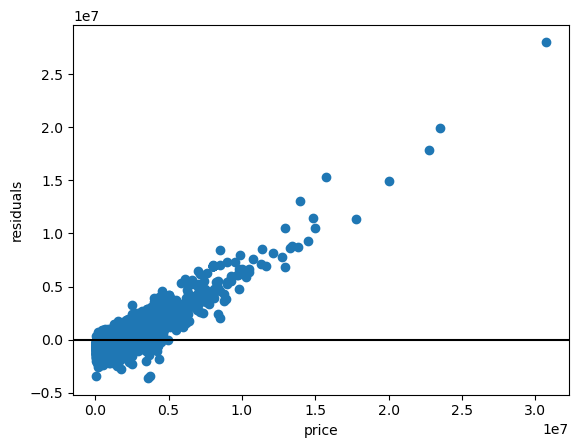

In [68]:
fig, ax = plt.subplots()

ax.scatter(df["price"], model_scaled_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("price")
ax.set_ylabel("residuals");

scaling doesnt improve non-lineairty issues.

In [69]:
y = df['price']

In [70]:
y_log = np.log(y)

<AxesSubplot:ylabel='Frequency'>

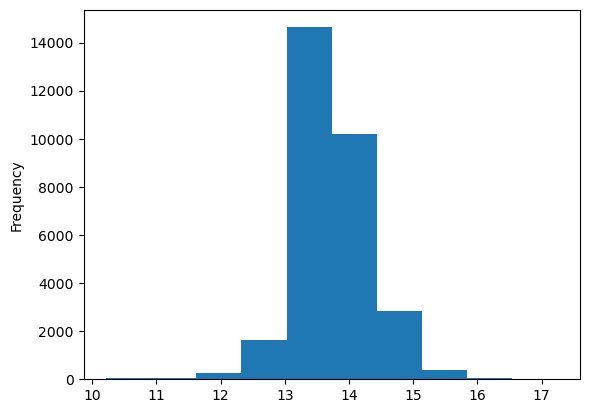

In [71]:
y_log.plot(kind ='hist')

more normal

In [72]:
df_X2_log_living = df_X2

In [73]:
df_X2_log_living['sqft_living_log']= np.log(df_X2_log_living['sqft_living'])

In [74]:
df_X2_log_living= df_X2_log_living.drop("sqft_living", axis=1)

<AxesSubplot:ylabel='Frequency'>

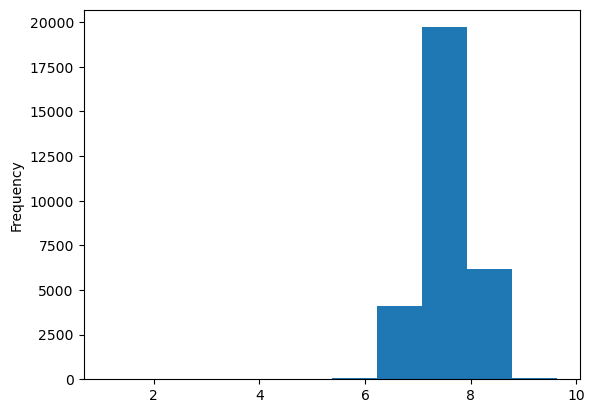

In [75]:
df_X2_log_living['sqft_living_log'].plot(kind='hist', bins=10)

more normal

In [76]:
model_log_pr_liv = sm.OLS(y_log, sm.add_constant(df_X2_log_living))
model_log_pr_liv_results = model_log_pr_liv.fit()


In [178]:
model_log_pr_liv_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     4131.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        15:10:40   Log-Likelihood:                -17465.
No. Observations:               30155   AIC:                         3.494e+04
Df Residuals:                   30148   BIC:                         3.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.0428      0.062    146.677      0.000       8.922       9.164
bedrooms           -0.0047      0.004     -1.328      0.184      -0.012       0.002
sqft_garage        -0.0002   1.05e-05    -16.720      0.000      -0.000      -0.000
sqft_patio          0.0001   1.12e-05      9.140      0.000    8.05e-05       0.000
grade_num           0.2004      0.003     62.370      0.000       0.194       0.207
view_num            0.0823      0.003     26.840      0.000       0.076       0.088
sqft_living_log     0.4215      0.011     39.454      0.000       0.401       0.442
==============================================================================
Omnibus:                     6403.625   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69899.721
Skew:                          -0.709   Prob(JB):                         0.00
Kurtosis:                      10.323   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
y_log.value_counts().sort_index()

10.216837    1
10.224230    1
10.250864    1
10.259727    1
10.270004    1
            ..
16.694709    1
16.811243    1
16.940076    1
16.972511    1
17.241401    1
Name: price, Length: 5202, dtype: int64

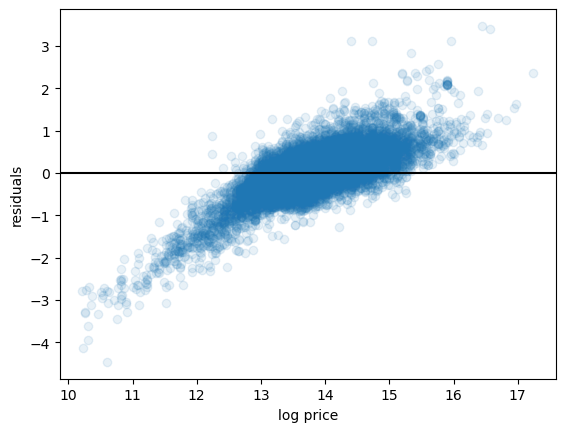

In [78]:
fig, ax = plt.subplots()

ax.scatter(y_log, model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("log price")
ax.set_ylabel("residuals");

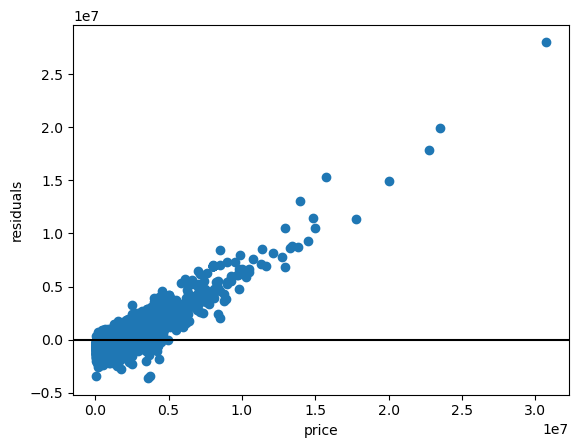

In [79]:
fig, ax = plt.subplots()

ax.scatter(df["price"], model_2575_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("price")
ax.set_ylabel("residuals");

Modest improvement in 0-centeredness of residuals, from top to bottom (newer to older model). Definitely non-linear issues, maybe heterskedaticity.

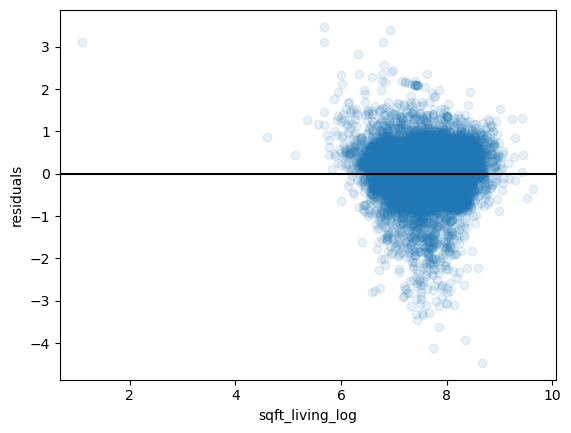

In [80]:
fig, ax = plt.subplots()

ax.scatter(df_X2_log_living['sqft_living_log'], model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living_log")
ax.set_ylabel("residuals");

residuals somewhat larger in middle

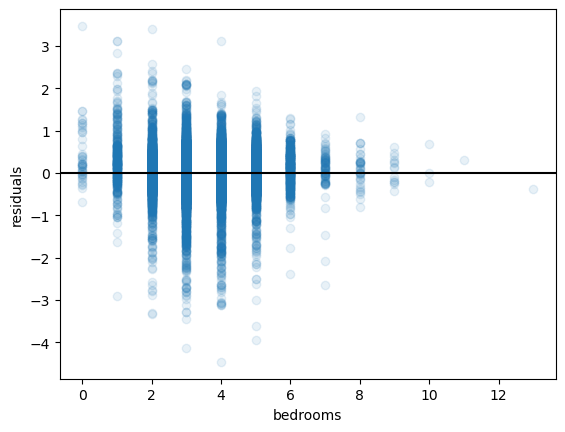

In [81]:
# not sign. fig, ax = plt.subplots()

ax.scatter(df_X2_log_living['bedrooms'], model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("bedrooms")
ax.set_ylabel("residuals");

residuals somewhat larger in middle

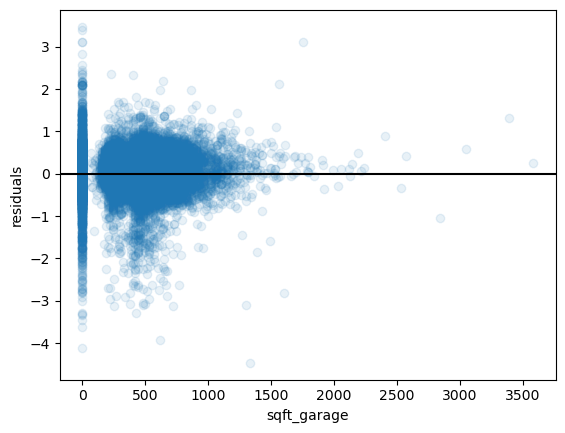

In [82]:
fig, ax = plt.subplots()

ax.scatter(df_X2_log_living['sqft_garage'], model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_garage")
ax.set_ylabel("residuals");

residuals somewhat larger with small variable

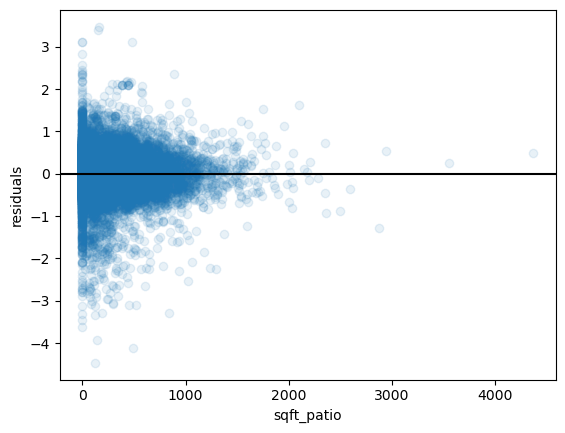

In [83]:
fig, ax = plt.subplots()

ax.scatter(df_X2_log_living['sqft_patio'], model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_patio")
ax.set_ylabel("residuals");

residuals larger with small variable

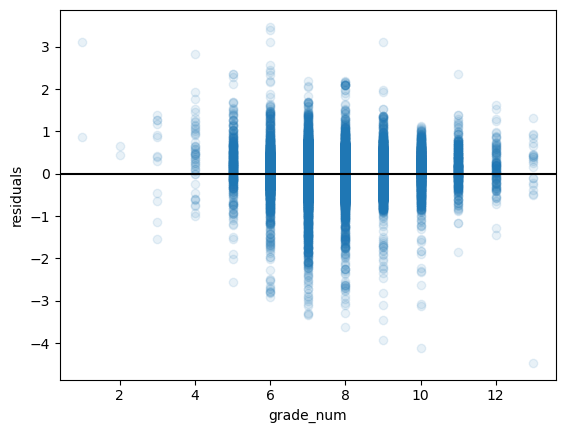

In [84]:
fig, ax = plt.subplots()

ax.scatter(df_X2_log_living['grade_num'], model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("grade_num")
ax.set_ylabel("residuals");

residuals somewhat larger in middle

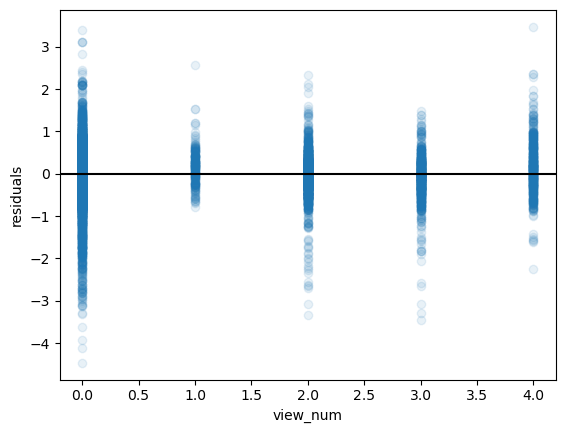

In [85]:
fig, ax = plt.subplots()

ax.scatter(df_X2_log_living['view_num'], model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("view_num")
ax.set_ylabel("residuals");

residuals somewhat consistent

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


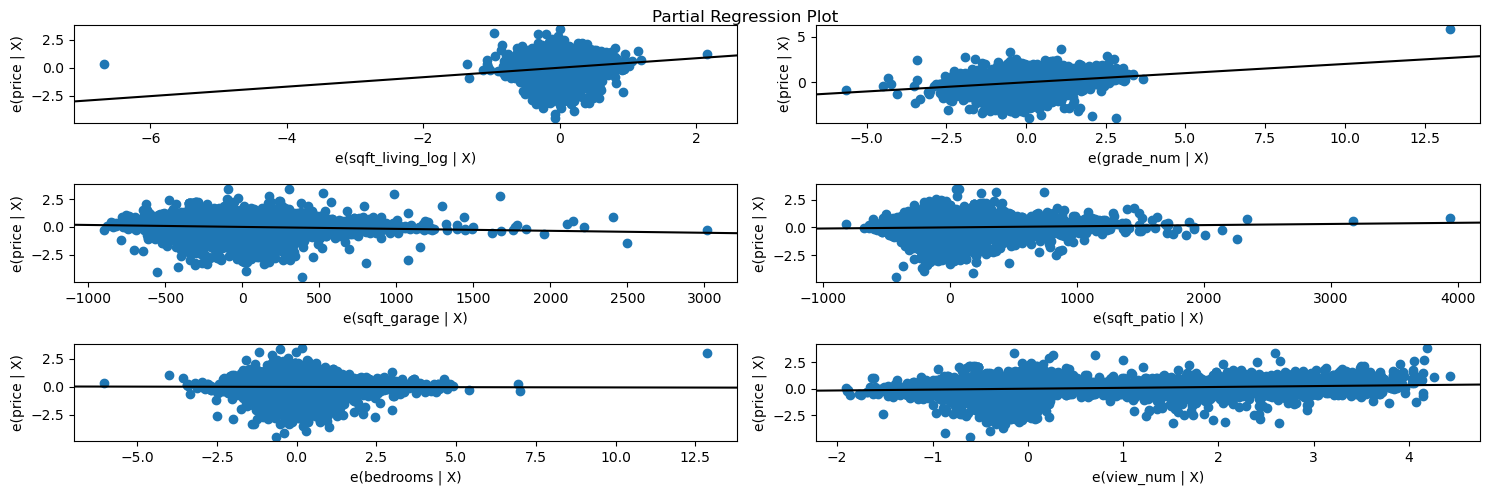

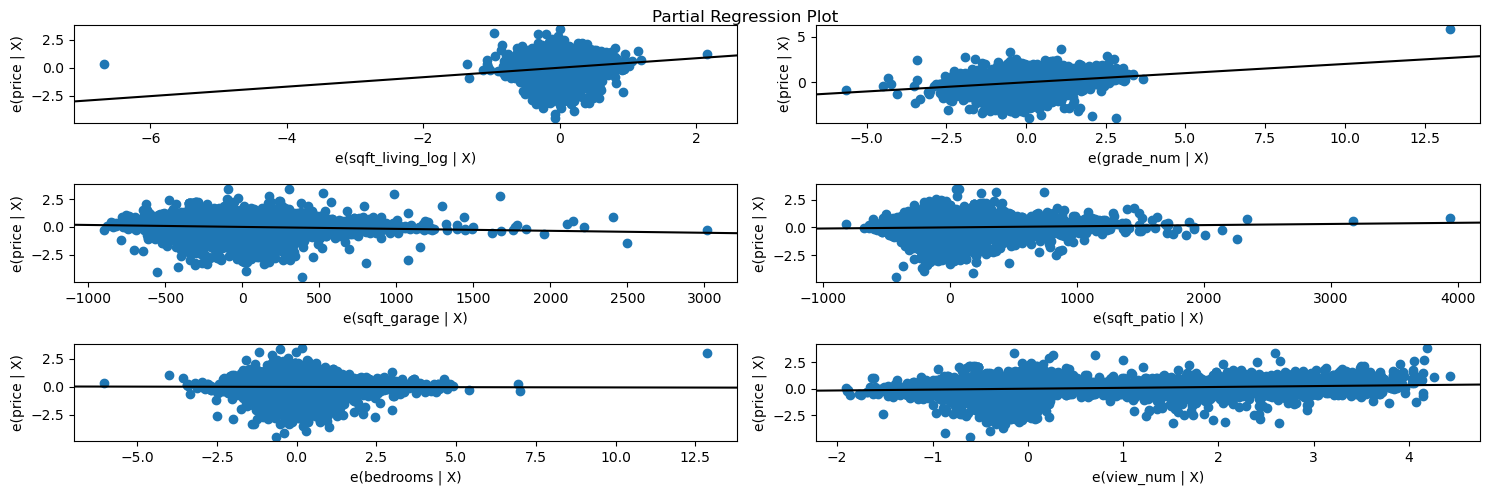

In [86]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(model_log_pr_liv_results, exog_idx=["sqft_living_log", "grade_num", "sqft_garage","sqft_patio", "bedrooms", "view_num"], fig=fig)

In [87]:
#*df.grade_num.value_counts().sort_index()

1         2
2         2
3        13
4        51
5       393
6      2858
7     11697
8      9410
9      3806
10     1371
11      406
12      122
13       24
Name: grade_num, dtype: int64

maybe non-linearity or heteroskedaticity in patiosqft, garagesqft, **bedrooms.

analyze strangeness in sqftgarage and patio and **bedrooms, looking at 0 value issues, whether these are data errors.

In [88]:
data.sqft_garage.value_counts().sort_index()

0       10009
1           1
40          1
70          2
80          5
        ...  
2570        1
2840        1
3050        1
3390        1
3580        1
Name: sqft_garage, Length: 412, dtype: int64

In [89]:
data.sqft_patio.value_counts().sort_index()

0       6760
8          1
10        20
12         1
14         1
        ... 
2590       1
2880       1
2940       1
3550       1
4370       1
Name: sqft_patio, Length: 526, dtype: int64

In [90]:
data.bedrooms.value_counts().sort_index()

0        44
1       391
2      3936
3     12754
4      9597
5      2798
6       498
7        80
8        38
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

In [91]:
data_a=data.drop(data.loc[df['bedrooms']>0].index)

In [92]:
data_a.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_built_adj,grade_num,condition_num,view_num
573,3920030050,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,...,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.672700,-122.317810,109,8,2,0
1289,2768301406,3/2/2022,1090000.0,0,0.0,1500,1262,3.0,NO,NO,...,0,2021,0,"A, Leadwood, Missouri 63653, United States",37.859790,-90.581130,121,8,2,0
1310,3462800015,11/10/2021,360000.0,0,0.0,910,19000,1.0,NO,NO,...,250,1946,0,"26125 79th Avenue South, Kent, Washington 9803...",47.366765,-122.235430,46,6,2,0
1952,2020069042,9/27/2021,399990.0,0,0.0,1677,43264,1.0,NO,NO,...,0,1969,0,"43407 212th Avenue Southeast, Enumclaw, Washin...",47.211660,-122.059200,69,7,2,0
2044,6896300047,9/17/2021,509000.0,0,1.0,400,2385,1.0,NO,NO,...,0,1946,0,"8416 B Island Dr S, Seattle, Washington 98118,...",47.528030,-122.261290,46,6,2,2
4835,9523101492,1/27/2022,830000.0,0,0.0,1255,983,3.0,NO,NO,...,0,2018,0,"307 North 65th Street, Seattle, Washington 981...",47.675845,-122.354885,118,7,2,0
5811,2424049035,8/19/2021,13950000.0,0,1.0,290,178017,1.0,YES,NO,...,160,1940,0,"5045 Forest Avenue Southeast, Mercer Island, W...",47.556910,-122.230600,40,6,4,4
7545,4318200415,12/17/2021,1225000.0,0,0.0,1940,8893,2.0,NO,NO,...,210,2016,0,"7453 Gatewood Road Southwest, Seattle, Washing...",47.536140,-122.385170,116,8,2,0
8338,9265400150,7/20/2021,550000.0,0,0.0,1370,8169,2.0,NO,NO,...,350,1989,0,"615 Yakima Avenue South, Pacific, Washington 9...",47.258675,-122.255300,89,7,2,0
8391,9178601015,11/30/2021,1625000.0,0,1.0,290,4000,1.0,NO,NO,...,0,2018,0,"2308 North 41st Street, Seattle, Washington 98...",47.656915,-122.330900,118,7,2,0


In [93]:
data.sqft_living.mean()

2112.4247388492786

0 bedrooms dont make sense, have significant sqfootage, larger than studio

<AxesSubplot:xlabel='sqft_garage', ylabel='sqft_patio'>

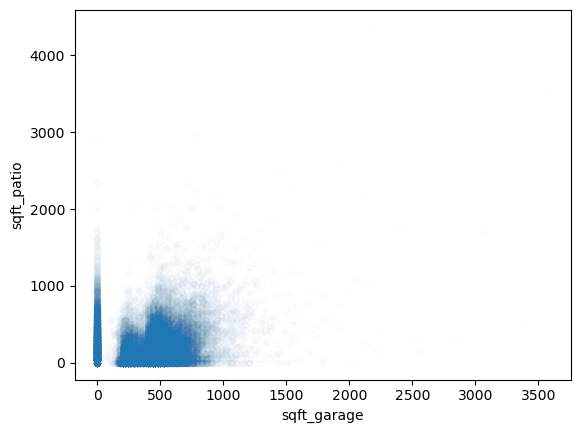

In [149]:
df_X2_log_living.plot(kind = 'scatter', x = 'sqft_garage', y='sqft_patio', alpha = .01)

fairly low crossover between 0's , dropping them would eliminate large part of dataset.

Check normality of residuals.

<AxesSubplot:ylabel='Frequency'>

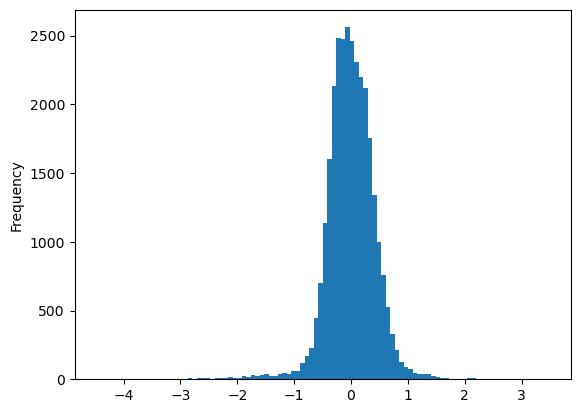

In [121]:
model_log_pr_liv_results.resid.plot(kind ='hist', bins = 100)

residuals look fairly normal for log price&sqftliving model, slight improvemnt from non-log model.  Skewness is slightly negative and improved from high positives in earlier model.  Kurtosis is high.

Start interpreting coefficients with easiest first (non-transformed predictors)

Formula for interpreting raw predictor vs log target:

For each increase of 1 unit in x we see an associated change of ((e^B-1)*100)% in y

Calculate interpretation for the significant non-tranformed predictors: sqft_garage, sqft_patio, grade_num, view_num, bedrooms:

In [94]:
sqft_garage_coef = (np.exp(-0.0002)-1)*100

In [95]:
sqft_garage_coef

-0.019998000133325533

For 1 sqft increase in garage sqft, decrease of .02% in price.

The neg. percentage is counter-intuitive, but very small.  Sqft_patio should be similarly small given coefficient similarity, so skip calculation.

In [96]:
grade_num_coef= (np.exp(.2004)-1)*100

In [97]:
grade_num_coef

22.189141698868408

For each 1 unit increase in grade, increase of 22% in price.

In [98]:
view_num_coef= (np.exp(0.0823)-1)*100

In [99]:
view_num_coef

8.578149542289438

For each 1 unit increase in view, increase of 9% in price.

In [100]:
bedrooms_coef= (np.exp(0.0092)-1)*100

In [101]:
bedrooms_coef

0.9242450080380493

For each 1 unit increase in bedrooms, increase of .92% in price. **This seems very small.

Calculate interpretation for the significant tranformed predictors:sqft_living_log

Formula for interpreting log predictor vs log target:

For each increase of p% in x we see an associated change of ((e^(B*log((100+p)/100))-1)*100)% in y

For each increase of p% in sqft_living_log, we see an associated change of ((np.exp(2.6432*np.log((100+p)/100))-1)*100)% in y

In [102]:
(np.exp(2.6432*np.log((100+1)/100))-1)*100

2.6649630500234167

Therefore, for example, for each increase of 1% in sqft_living_log, we see an associated change of 2.66% in y

## New model with more log tranformed variables (sqft_patio,sqft_garage) and 0 bedroom houses removed and remove bedrooms as predictor. *Improving on linearity issue and heteroskedaticity issues and non-normality issues..

initialize X3 df and remove 0 bedroom houses.

In [179]:
df_X3_logs = df_X2_log_living

In [180]:
df_X3_logs['y_log']=y_log

In [181]:
df_X3_logs = df_X3_logs.drop(df_X3_logs.loc[df_X3_logs['bedrooms']==0].index)

In [182]:
df_X3_logs.describe()

,bedrooms,sqft_garage,sqft_patio,grade_num,view_num,sqft_living_log,y_log
count,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,3.418518,330.611969,217.664973,7.653283,0.294610,7.559574,13.734944
std,0.973611,285.714497,245.369890,1.147250,0.853607,0.442293,0.582719
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.098612,10.216837
25%,3.000000,0.000000,40.000000,7.000000,0.000000,7.258412,13.381692
50%,3.000000,400.000000,150.000000,8.000000,0.000000,7.560080,13.664688
75%,4.000000,510.000000,320.000000,8.000000,0.000000,7.870930,14.077875
max,13.000000,3580.000000,4370.000000,13.000000,4.000000,9.639522,17.241401


In [183]:
df_X3_logs= df_X3_logs.drop("bedrooms", axis=1)

Create two dummy variables for whether house has garage and patio.

In [184]:
garage_yes = df_X3_logs['sqft_garage'].map(lambda x: 0 if x==0 else 1)

In [185]:
patio_yes = df_X3_logs['sqft_patio'].map(lambda x: 0 if x==0 else 1)

In [186]:
df_X3_logs['garage_yes']=garage_yes

In [187]:
df_X3_logs['patio_yes']=patio_yes

Substitute .1 in for 0 values in sqft gar & patio in order to log transform.  .1 is equivalent to 0 as both mean essentially no garage or patio.

In [188]:
df_X3_logs['sqft_garage'] = df_X3_logs['sqft_garage'].map(lambda x: .1 if x==0 else x)

In [189]:
df_X3_logs['sqft_patio'] = df_X3_logs['sqft_patio'].map(lambda x: .1 if x==0 else x)

In [190]:
#df_X3_logs.describe()

In [191]:
df_X3_logs['sqft_garage_log']= np.log(df_X3_logs['sqft_garage'])

df_X3_logs= df_X3_logs.drop("sqft_garage", axis=1)

In [192]:
df_X3_logs['sqft_patio_log']= np.log(df_X3_logs['sqft_patio'])

df_X3_logs= df_X3_logs.drop("sqft_patio", axis=1)

In [193]:
df_X3_logs.describe()

,grade_num,view_num,sqft_living_log,y_log,garage_yes,patio_yes,sqft_garage_log,sqft_patio_log
count,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,7.653283,0.294610,7.559574,13.734944,0.668892,0.776560,3.334548,3.594988
std,1.147250,0.853607,0.442293,0.582719,0.470620,0.416558,3.979824,3.254219
min,1.000000,0.000000,1.098612,10.216837,0.000000,0.000000,-2.302585,-2.302585
25%,7.000000,0.000000,7.258412,13.381692,0.000000,1.000000,-2.302585,3.688879
50%,8.000000,0.000000,7.560080,13.664688,1.000000,1.000000,5.991465,5.010635
75%,8.000000,0.000000,7.870930,14.077875,1.000000,1.000000,6.234411,5.768321
max,13.000000,4.000000,9.639522,17.241401,1.000000,1.000000,8.183118,8.382518


In [194]:
df_X3_logs.corr()

,grade_num,view_num,sqft_living_log,y_log,garage_yes,patio_yes,sqft_garage_log,sqft_patio_log
grade_num,1.000000,0.201471,0.702286,0.615161,0.338085,0.257153,0.366404,0.303495
view_num,0.201471,1.000000,0.209148,0.272822,-0.031063,0.100326,-0.024930,0.144210
sqft_living_log,0.702286,0.209148,1.000000,0.592648,0.345746,0.298513,0.378199,0.345624
y_log,0.615161,0.272822,0.592648,1.000000,0.151029,0.196861,0.171508,0.243212
garage_yes,0.338085,-0.031063,0.345746,0.151029,1.000000,0.105426,0.996572,0.102380
patio_yes,0.257153,0.100326,0.298513,0.196861,0.105426,1.000000,0.117787,0.972135
sqft_garage_log,0.366404,-0.024930,0.378199,0.171508,0.996572,0.117787,1.000000,0.117978
sqft_patio_log,0.303495,0.144210,0.345624,0.243212,0.102380,0.972135,0.117978,1.000000


High correlations between dummies and sqft_garage_log	sqft_patio_log may suggest multicollinearity/confounding variable issues, but domain knowledge says that both the existense of garage/patio and the size should have seperate effects on price.	

seperating out dep. var.:

In [195]:
y_log_X3 = df_X3_logs['y_log']

In [196]:
df_X3_logs= df_X3_logs.drop("y_log", axis=1)

In [197]:
model_X3_logs = sm.OLS(y_log_X3, sm.add_constant(df_X3_logs))
model_X3_logs_results = model_X3_logs.fit()


In [198]:
model_X3_logs_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     3595.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        15:15:38   Log-Likelihood:                -17317.
No. Observations:               30111   AIC:                         3.465e+04
Df Residuals:                   30103   BIC:                         3.472e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.9024      0.063    140.247      0.000       8.778       9.027
grade_num           0.2022      0.003     64.620      0.000       0.196       0.208
view_num            0.0797      0.003     26.202      0.000       0.074       0.086
sqft_living_log     0.4305      0.008     50.815      0.000       0.414       0.447
garage_yes          0.4250      0.071      6.019      0.000       0.287       0.563
patio_yes          -0.2103      0.026     -8.008      0.000      -0.262      -0.159
sqft_garage_log    -0.0641      0.008     -7.562      0.000      -0.081      -0.047
sqft_patio_log      0.0278      0.003      8.094      0.000       0.021       0.035
==============================================================================
Omnibus:                     6630.073   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70408.942
Skew:                          -0.756   Prob(JB):                         0.00
Kurtosis:                      10.337   Cond. No.                         415.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

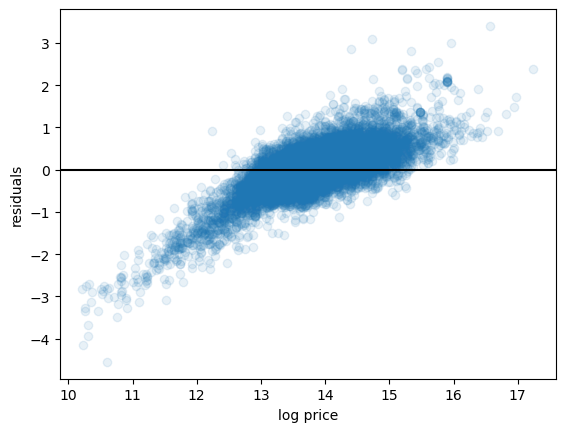

In [199]:
fig, ax = plt.subplots()

ax.scatter(y_log_X3, model_X3_logs_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("log price")
ax.set_ylabel("residuals");

previous residual scatter

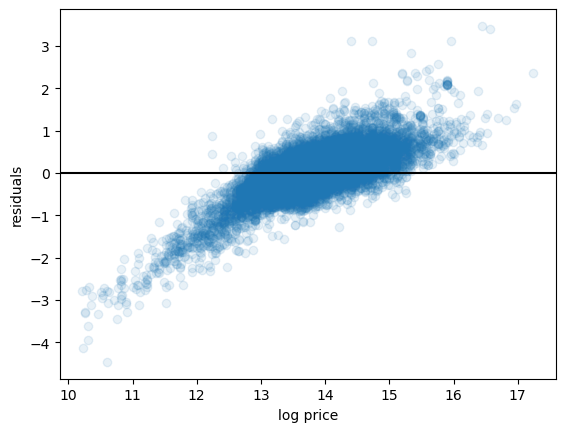

In [200]:
fig, ax = plt.subplots()

ax.scatter(y_log, model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("log price")
ax.set_ylabel("residuals");

very modest if any linearity improvement, maybe should log grade , view.

check heterskedaticity, normality of residuals, non linearity in reg pots